In [66]:
from HeaderP import *

In [67]:
import pylab
import matplotlib.pylab as plt
import matplotlib
import numpy as np
import os, pickle
import Astraea
import pandas as pd

In [80]:
import pynbody as pb

In [81]:
path_to_simulation = "./2.79e12.01550"

s = pb.load(path_to_simulation) 
s.physical_units()

In [86]:
s.stars.keys()

['eps',
 'pos',
 'z',
 'phi',
 'vx',
 'vy',
 'tform',
 'x',
 'mass',
 'vel',
 'metals',
 'y',
 'vz']

In [32]:
data=pd.DataFrame(np.array(np.asarray(s.stars['x']),np.asarray(s.stars['y']),np.asarray(s.stars['z']),
                           np.asarray(s.stars['iords'])).T,
                  columns=['x','y','z','iords'])

KeyError: 'No array iords for family star'

In [45]:
simNo='2_79e12'
select=False

In [46]:
#data=pd.read_pickle('Data/Buck_g'+simNo+'.pkl')
#data=pd.read_pickle('../SecondYear/CannonDR16_cut.pkl')
#select=pd.read_pickle('Data/Buck_g'+simNo+'_apogee_selec.pkl')
#data=pd.merge(data,select[['iords','ofe_scale','feh_scale']],left_on='iords',right_on='iords')
#data.to_pickle('Data/Buck_g'+simNo+'_apogee_selec.pkl')

In [47]:
if simNo=='data':
    data=pd.read_pickle('../SecondYear/CannonDR16_cut.pkl')
    data['z_today']=data['z']
    data['x_today']=data['X']
    data['y_today']=data['Y']
    data['feh_scale']=data['M_H']
    data['ofe_scale']=data['O_FE']
    data['age']=data['Age']
elif select:
    data=pd.read_pickle('Data/Buck_g'+simNo+'_apogee_selec.pkl')
    data['R_bir']=np.sqrt((data['x_birth'])**2+data['y_birth']**2)
    data['R']=np.sqrt((data['x_today'])**2+data['y_today']**2)
    scale_fe=0.250019907951355/np.std(data['feh'])
    scale_o=0.10861970484256744/np.std(data['ofe'])
    data['feh_scale']=data['feh']*scale_fe-0.0906638577580452-np.mean(data['feh'])
    data['ofe_scale']=data['ofe']*scale_o+0.08182460814714432-np.mean(data['ofe'])
elif not select:
    data=pd.read_pickle('Data/Buck_g'+simNo+'.pkl')
    data['R_bir']=np.sqrt((data['x_birth'])**2+data['y_birth']**2)
    data['R']=np.sqrt((data['x_today'])**2+data['y_today']**2)
    scale_fe=0.250019907951355/np.std(data['feh'])
    scale_o=0.10861970484256744/np.std(data['ofe'])
    data['feh_scale']=data['feh']*scale_fe-0.0906638577580452-np.mean(data['feh'])
    data['ofe_scale']=data['ofe']*scale_o+0.08182460814714432-np.mean(data['ofe'])

In [48]:
data['R_bir_err']=np.zeros(len(data))

In [49]:
trainf=['x','y','z','Jphi','Jz','Jr','ofe','feh','age','R']

In [50]:
import random
ind=data.index.values
random.shuffle(ind)
data=data.iloc[ind[0:100000]]

In [51]:
data=data.loc[data['R_bir']<20]
data=data.dropna(subset=np.append(trainf,['R_bir'])).reset_index()

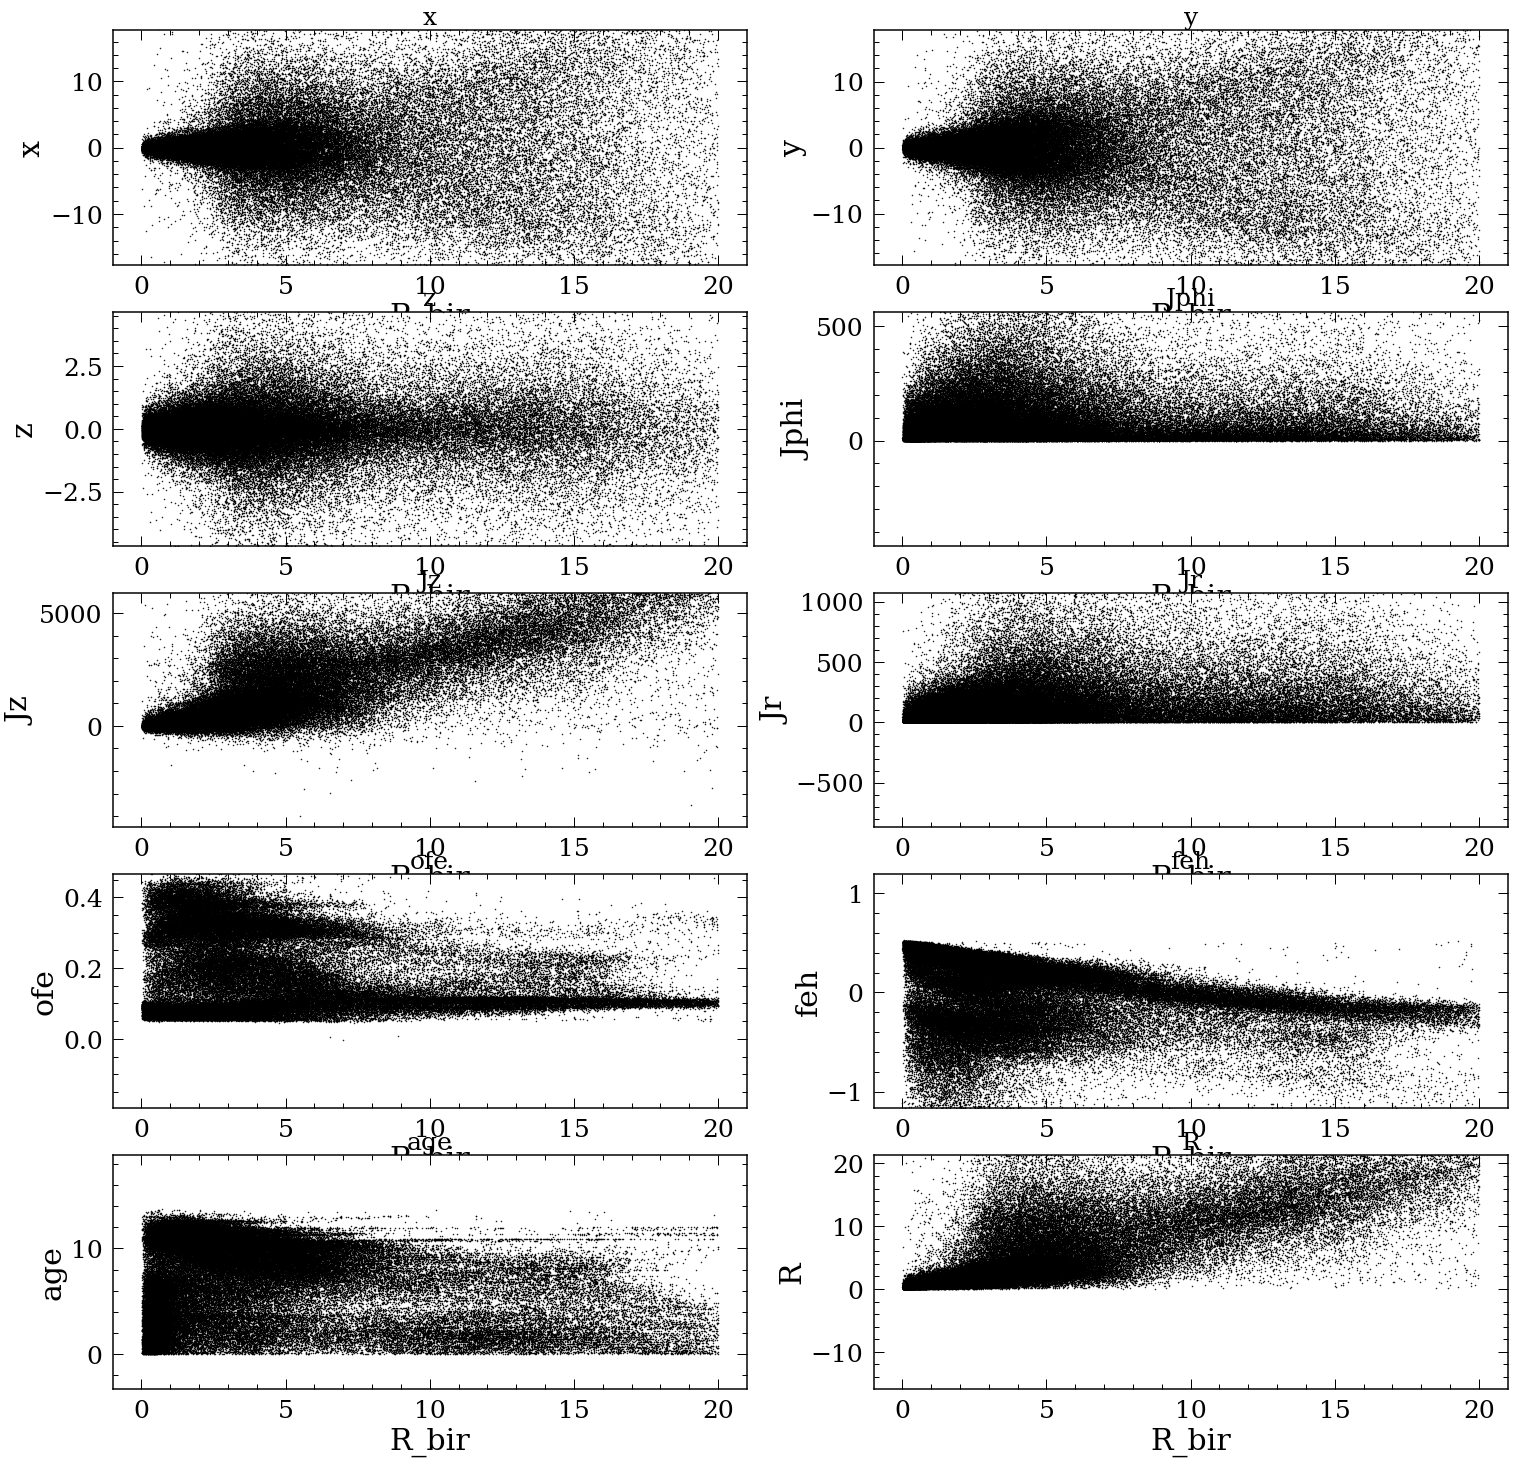

In [52]:
Astraea.plot_corr(data,trainf,MS=1, x_var='R_bir')

In [53]:
regr, regr_outs = Astraea.RFregressor(data, trainf,ID_on='iords',
                                      target_var='R_bir', target_var_err='R_bir_err', 
                                      n_estimators=1)



Simpliest example:
 regr,regr_outs = RFregressor(df,testF)

Fraction of data used to train: 0.8
# of Features attempt to train: 10
Features attempt to train: ['x', 'y', 'z', 'Jphi', 'Jz', 'Jr', 'ofe', 'feh', 'age', 'R']
94921 stars in dataframe!
94921 total stars used for RF!
75936 training stars!
Finished training! Making predictions!
Finished predicting! Calculating statistics!
Median Relative Error is: 0.2654404413198785
Average chi^2 is: nan
Finished!


/opt/homebrew/anaconda3/lib/python3.8/site-packages/Astraea-0.1.0-py3.8.egg/Astraea/Astraea.py:299: RuntimeWarning: invalid value encountered in double_scalars
  ave_chi=sum([(TrueVal[i]-PreVal[i])**2./TrueVal_err[i] for i in range(len(TrueVal_err))])/(len(PreVal)-validv)


/opt/homebrew/anaconda3/lib/python3.8/site-packages/Astraea-0.1.0-py3.8.egg/Astraea/Astraea.py:783: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(y_test,prediction,'r.',Markersize=MS,alpha=0.2)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/Astraea-0.1.0-py3.8.egg/Astraea/Astraea.py:786: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  plt.ylim([min(prediction),max(prediction)])
/opt/homebrew/anaconda3/lib/python3.8/site-packages/Astraea-0.1.0-py3.8.egg/Astraea/Astraea.py:787: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  plt.xlim([min(prediction),max(prediction)])


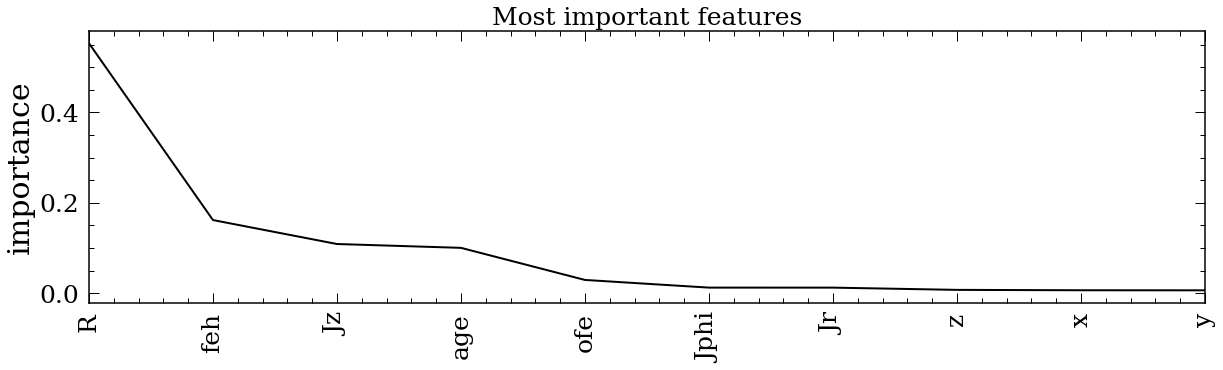

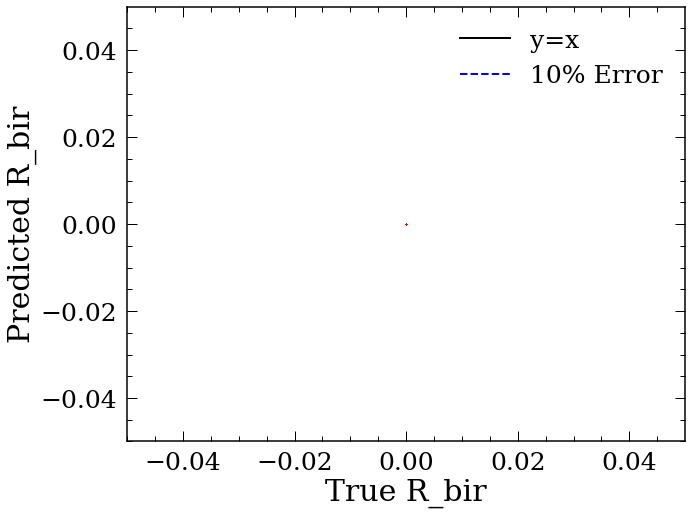

In [54]:
Astraea.plot_result(regr_outs['actrualF'], regr_outs['importance'], regr_outs['prediction'],
                    regr_outs['y_test'], labelName='R_bir', MS=1)

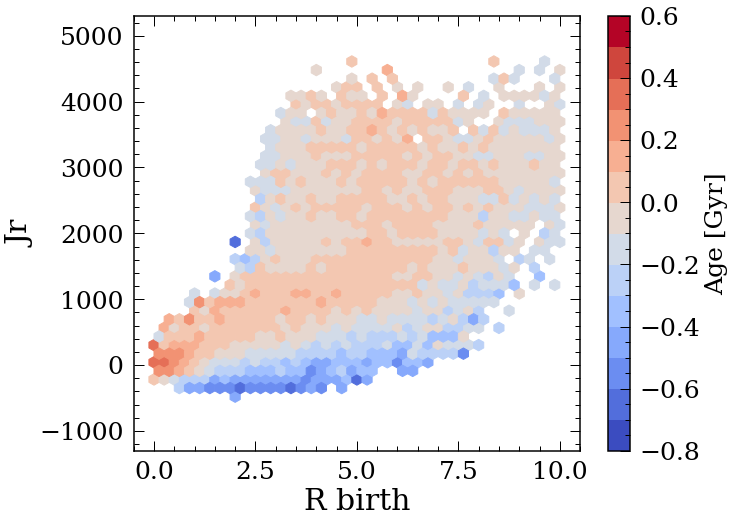

In [55]:
import matplotlib.pylab as plt

plt.figure(figsize=(10,8))
x1,x2,y1,y2 = 0,10,-1000,5000
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40
cm = plt.cm.get_cmap('coolwarm',14)
plt.hexbin(data['R_bir'].values,data['Jz'].values,C=data['feh'].values,
                             cmap=cm,vmin=-0.8,vmax=0.6, gridsize=40,extent=(x1,x2,y1,y2),
                             reduce_C_function = np.mean,mincnt=10)
plt.xlabel('R birth')
plt.ylabel('Jr')
cbar = plt.colorbar()
car = cbar.set_label('Age [Gyr]',fontsize = 25,labelpad = 5)

In [56]:
orginal=data.loc[data['iords'].isin(regr_outs['ID_test'])]['R_bir']
predictions=regr.predict(data.loc[data['iords'].isin(regr_outs['ID_test'])][regr_outs['actrualF']].values)

Text(0, 0.5, 'Predicted R_bir')

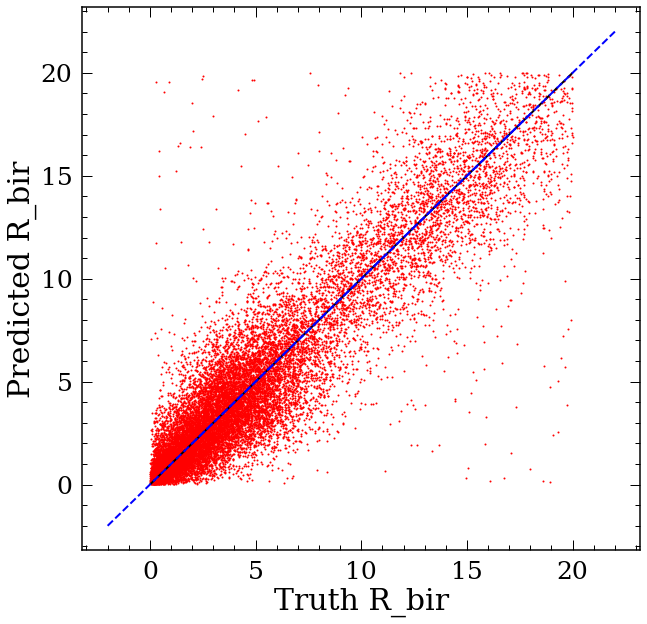

In [57]:
plt.scatter(orginal,predictions,s=1,c='r')
plt.plot([0,20],[0,20],'k--')
plt.plot([2,22],[2,22],'b--')
plt.plot([-2,18],[-2,18],'b--')
plt.xlabel('Truth R_bir')
plt.ylabel('Predicted R_bir')

Text(0, 0.5, 'ΔR')

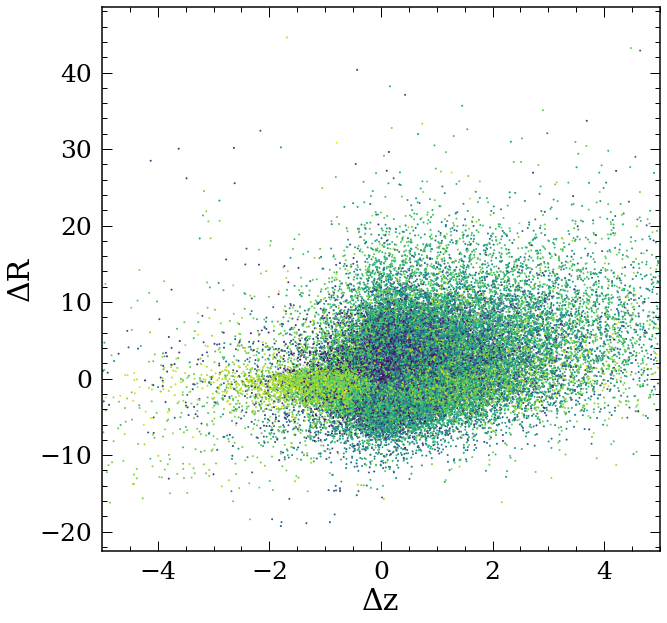

In [61]:
data['dR']=data['R']-data['R_bir']
data['dz']=abs(data['z'])-abs(data['z_birth'])
plt.scatter(data['dz'],data['dR'],s=1,c=data['age'])
plt.xlim([-5,5])
plt.xlabel('Δz')
plt.ylabel('ΔR')